# Importing all the required libraries

In [186]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Importing the data

In [187]:
data = pd.read_csv("HINDUNILVR.NS.csv")
data.drop("Adj Close", axis=1, inplace=True)
data.head(10)

,Date,Open,High,Low,Close,Volume
0,1996-01-01,62.200001,62.575001,61.805000,61.805000,11000.0
1,1996-01-02,61.805000,62.700001,61.825001,62.465000,203500.0
2,1996-01-03,62.465000,62.349998,61.799999,62.095001,58000.0
3,1996-01-04,62.000000,62.299999,61.900002,62.099998,111500.0
4,1996-01-05,62.099998,62.400002,61.500000,62.000000,39500.0
5,1996-01-08,62.000000,62.150002,61.525002,62.025002,107500.0
6,1996-01-09,62.025002,62.500000,61.799999,62.259998,114500.0
7,1996-01-10,62.259998,62.799999,62.005001,62.705002,113500.0
8,1996-01-11,62.705002,62.799999,62.005001,62.400002,67500.0
9,1996-01-12,62.400002,62.799999,62.400002,62.435001,57000.0


## Calulating 24W Trailing High, Low and 12W Trailing High, Low
1 ) For calculating the Trailings High and Low we'll first onvert the available dates from just working days (Mon-Fri) to all week days (Mon-Sun). <br>
2 ) Then, the 12W Trailing High will be the High of 12*7 day behind the observed/cuurent day. <br>
3 ) The same as above can be done for calculating other Trailing Indiators

In [188]:
data.Date = pd.to_datetime(data.Date) #Convert "Date" column to timestamps
data.set_index("Date", drop=True, inplace=True) #setting "Date" column as index

In [189]:
data = data.asfreq('D').fillna(-1) #filling the non-business days with -1 to indicate that on this day market was closed
data.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-01,62.200001,62.575001,61.805000,61.805000,11000.0
1996-01-02,61.805000,62.700001,61.825001,62.465000,203500.0
1996-01-03,62.465000,62.349998,61.799999,62.095001,58000.0
1996-01-04,62.000000,62.299999,61.900002,62.099998,111500.0
1996-01-05,62.099998,62.400002,61.500000,62.000000,39500.0
1996-01-06,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1996-01-07,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1996-01-08,62.000000,62.150002,61.525002,62.025002,107500.0
1996-01-09,62.025002,62.500000,61.799999,62.259998,114500.0


In [190]:
#If the Trailing day is non-business then take the near business day
def take(x):
    for i in range(len(x)):
        if x[i] != -1:
            return x[i]   

In [191]:
data["24W THigh"] = data.asfreq('D')['High'].rolling(window=24*7, min_periods=1).apply(lambda x: take(x=x))
data["24W TLow"] = data.asfreq('D')['Low'].rolling(window=24*7, min_periods=1).apply(lambda x: take(x=x))
data["12W THigh"] = data.asfreq('D')['High'].rolling(window=12*7, min_periods=1).apply(lambda x: take(x=x))
data["12W TLow"] = data.asfreq('D')['Low'].rolling(window=12*7, min_periods=1).apply(lambda x: take(x=x))

data.head(10)

,Open,High,Low,Close,Volume,24W THigh,24W TLow,12W THigh,12W TLow
Date,,,,,,,,,
1996-01-01,62.200001,62.575001,61.805000,61.805000,11000.0,62.575001,61.805,62.575001,61.805
1996-01-02,61.805000,62.700001,61.825001,62.465000,203500.0,62.575001,61.805,62.575001,61.805
1996-01-03,62.465000,62.349998,61.799999,62.095001,58000.0,62.575001,61.805,62.575001,61.805
1996-01-04,62.000000,62.299999,61.900002,62.099998,111500.0,62.575001,61.805,62.575001,61.805
1996-01-05,62.099998,62.400002,61.500000,62.000000,39500.0,62.575001,61.805,62.575001,61.805
1996-01-06,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,62.575001,61.805,62.575001,61.805
1996-01-07,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,62.575001,61.805,62.575001,61.805
1996-01-08,62.000000,62.150002,61.525002,62.025002,107500.0,62.575001,61.805,62.575001,61.805
1996-01-09,62.025002,62.500000,61.799999,62.259998,114500.0,62.575001,61.805,62.575001,61.805


In [192]:
data.drop(data.query("Open == -1").index, axis=0, inplace=True) #Droping non-business days after calculation of Trailing Indicators

In [194]:
data.head(10)

,Open,High,Low,Close,Volume,24W THigh,24W TLow,12W THigh,12W TLow
Date,,,,,,,,,
1996-01-01,62.200001,62.575001,61.805000,61.805000,11000.0,62.575001,61.805,62.575001,61.805
1996-01-02,61.805000,62.700001,61.825001,62.465000,203500.0,62.575001,61.805,62.575001,61.805
1996-01-03,62.465000,62.349998,61.799999,62.095001,58000.0,62.575001,61.805,62.575001,61.805
1996-01-04,62.000000,62.299999,61.900002,62.099998,111500.0,62.575001,61.805,62.575001,61.805
1996-01-05,62.099998,62.400002,61.500000,62.000000,39500.0,62.575001,61.805,62.575001,61.805
1996-01-08,62.000000,62.150002,61.525002,62.025002,107500.0,62.575001,61.805,62.575001,61.805
1996-01-09,62.025002,62.500000,61.799999,62.259998,114500.0,62.575001,61.805,62.575001,61.805
1996-01-10,62.259998,62.799999,62.005001,62.705002,113500.0,62.575001,61.805,62.575001,61.805
1996-01-11,62.705002,62.799999,62.005001,62.400002,67500.0,62.575001,61.805,62.575001,61.805


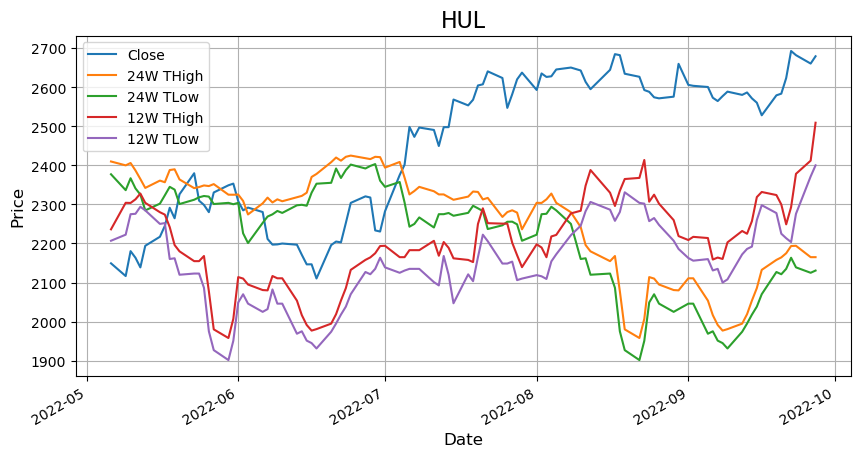

In [208]:
cols = ['Close', '24W THigh', '24W TLow', '12W THigh', '12W TLow']

data[cols].iloc[-100:].plot(figsize=(10, 5))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("HUL", fontsize=16)
plt.grid()
plt.legend(fontsize=10);

# Trade Log
### Trade Log will have all details of the trades

In [209]:
#Creating trade_log
trade_log = pd.DataFrame(columns=['trade_type','entry_time','entry_price','exit_time','exit_price'])
trade_log

,trade_type,entry_time,entry_price,exit_time,exit_price


## Trading

In [210]:
data.reset_index(inplace=True) #for being able to use iloc

In [211]:
buy_trade_triggered = False  #this will help to not to take a position,when we already have one

for index, row in data[1:].iterrows():
    previous_row = data.iloc[index-1]

    buy_trade_triggered = True
    buy_price = (previous_row['Close'] + row['12W TLow'])/2
    trade_log = trade_log.append({'trade_type':'BUY',
                                    'entry_time':row['Date'],
                                    'entry_price': buy_price}, ignore_index=True)

    take_profit = buy_price*(1+0.04)
    stop_loss = buy_price*(1-0.01)

    if (buy_trade_triggered == True):
        if (row['High'] >= take_profit):
            buy_trade_triggered = False
            trade_log = trade_log.append({'exit_time':row['Date'],
                                        'exit_price':take_profit},ignore_index=True)

        elif (row['Low'] <= stop_loss):
            buy_trade_triggered = False
            trade_log = trade_log.append({'exit_time':row['Date'],
                                        'exit_price':stop_loss},ignore_index=True)
trade_log

,trade_type,entry_time,entry_price,exit_time,exit_price
0,BUY,1996-01-02 00:00:00,61.805000,NaT,NaN
1,BUY,1996-01-03 00:00:00,62.135000,NaT,NaN
2,BUY,1996-01-04 00:00:00,61.950001,NaT,NaN
3,BUY,1996-01-05 00:00:00,61.952499,NaT,NaN
4,BUY,1996-01-08 00:00:00,61.902500,NaT,NaN
...,...,...,...,...,...
12260,NaN,NaN,NaN,2022-09-23,2583.750000
12261,BUY,2022-09-26 00:00:00,2526.825074,NaT,NaN
12262,NaN,NaN,NaN,2022-09-26,2627.898076
12263,BUY,2022-09-27 00:00:00,2530.275024,NaT,NaN


### To get a better format in our trade_log, we are going to shift the exit_time & exit_price UP by a row

In [212]:
trade_log['exit_time'] = trade_log['exit_time'].shift(-1)
trade_log['exit_price'] = trade_log['exit_price'].shift(-1)
trade_log.dropna(inplace=True)
trade_log.reset_index(drop=True, inplace=True)

trade_log

,trade_type,entry_time,entry_price,exit_time,exit_price
0,BUY,1996-01-25 00:00:00,62.572500,1996-01-25,61.946775
1,BUY,1996-02-02 00:00:00,63.299999,1996-02-02,65.831999
2,BUY,1996-02-05 00:00:00,63.884998,1996-02-05,66.440398
3,BUY,1996-02-06 00:00:00,64.892501,1996-02-06,67.488202
4,BUY,1996-02-07 00:00:00,64.360000,1996-02-07,66.934401
...,...,...,...,...,...
5533,BUY,2022-09-21 00:00:00,2398.474976,2022-09-21,2494.413975
5534,BUY,2022-09-22 00:00:00,2413.600098,2022-09-22,2510.144102
5535,BUY,2022-09-23 00:00:00,2484.375000,2022-09-23,2583.750000
5536,BUY,2022-09-26 00:00:00,2526.825074,2022-09-26,2627.898076


# Backtesting Metrics
## Profit & Loss (pnl)

In [213]:
trade_log['pnl'] = trade_log['exit_price'] - trade_log['entry_price'] #pnl of every trade

trade_log['pnl_cumulative_sum'] = trade_log['pnl'].cumsum()

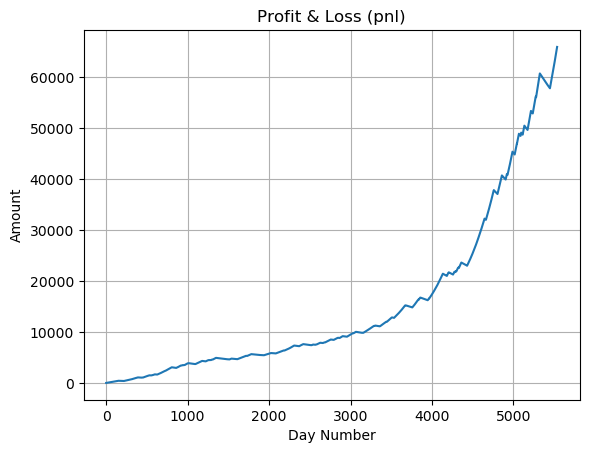

In [214]:
# Adding up the pnl of every trade and plotting it
trade_log['pnl_cumulative_sum'].plot(title = 'Profit & Loss (pnl)', xlabel = 'Day Number', ylabel = 'Amount', grid = True)

## Accounting for Slippages
### Slippage is the  difference between a trade’s expected price and the actual price at which the trade is executed

In [215]:
slippage = 0.005

# When we BUY, slippage is added, as buying at a higher price is a loss to us
trade_log['entry_including_slippage'] = trade_log['entry_price'] + (trade_log['entry_price']*slippage)
# When we SELL, slippage is deducted, as selling at a lower price is a loss to us
trade_log['exit_including_slippage'] = trade_log['exit_price'] - (trade_log['exit_price']*slippage)

# Calculating pnl, accounting for slippages
trade_log['pnl_including_slippage'] = trade_log['exit_including_slippage'] - trade_log['entry_including_slippage']

# Adding up the slippage accounted pnl and ploting it
trade_log['pnl_including_slippage_cumulative_sum'] = trade_log['pnl_including_slippage'].cumsum()

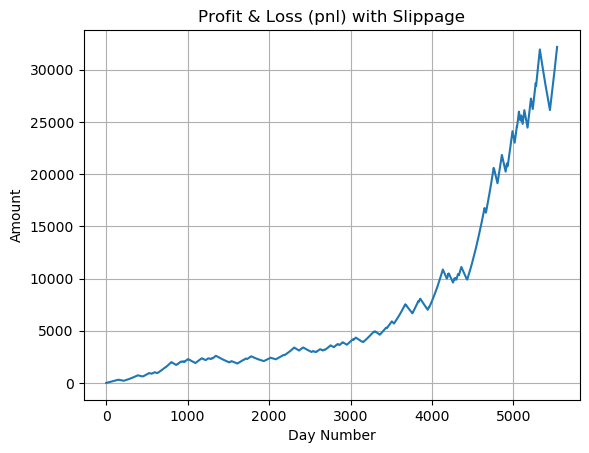

In [216]:
trade_log['pnl_including_slippage_cumulative_sum'].plot(title = 'Profit & Loss (pnl) with Slippage', \
                                                        xlabel = 'Day Number', ylabel = 'Amount', grid = True)

## Win Rate
### Win Rate is the ratio of profitable trades to all trades

In [217]:
profitable_trades = len(trade_log[trade_log['pnl_including_slippage']>0])
lossing_trades = len(trade_log)-profitable_trades
win_rate = profitable_trades/len(trade_log)

print("Number of Profitable Trades:", profitable_trades)
print("Number of Lossing Trades:", lossing_trades)
print("Win Rate:", round(win_rate, 2))

Number of Profitable Trades: 3264
Number of Lossing Trades: 2274
Win Rate: 0.59


## Average Profit & Loss per trade

In [218]:
avg_profit = trade_log[trade_log['pnl_including_slippage']>0]['pnl_including_slippage'].mean()
avg_loss = trade_log[trade_log['pnl_including_slippage']<0]['pnl_including_slippage'].mean()

print("Average Profit per trade:", round(avg_profit, 2))
print("Average Loss per trade:", round(avg_loss, 2))

Average Profit per trade: 18.15
Average Loss per trade: -11.9


## Risk Reward Ratio
### Risk Reward Ratio is the ratio of averge profit to average loss. It tells us how much we're gaining for every rupee we risk.

In [219]:
risk_reward = abs(avg_profit/avg_loss)
print("Risk Reward Ratio:", round(risk_reward, 2))

Risk Reward Ratio: 1.53


## Expectancy
### Expectancy shows how much money, on average, we can expect to make or lose for every rupee we risk.
### Expectancy  = (Win Rate x Average Profit) - (Loss Rate x Average Loss), where Loss Rate = 1 - (Win Rate)

In [220]:
expectancy = (win_rate*avg_profit) - ((1-win_rate)*avg_loss)
print("Expectancy:", round(expectancy, 2))

Expectancy: 15.59


# Lets run the strategy with an initial capital

In [221]:
initial_capital = 10_000
trade_log['equity'] = 0  # Equity is capital plus pnl
trade_log['rate_of_return'] = 0  # Rate of return tells us how much money we're getting back in terms of initial capital

for i in range(len(trade_log)):
    if i == 0:
        trade_log.loc[i, 'equity'] = initial_capital + trade_log['pnl_including_slippage'].iloc[i]
        trade_log['rate_of_return'].iloc[i] = (trade_log['pnl_including_slippage'].iloc[i]/initial_capital)*100
    else:
        trade_log['equity'].iloc[i] = trade_log['equity'].iloc[i-1] + trade_log['pnl_including_slippage'].iloc[i]
        trade_log['rate_of_return'].iloc[i] = (trade_log['pnl_including_slippage'].iloc[i]/trade_log['equity'].iloc[i-1])*100

C:\Users\Faizan\miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


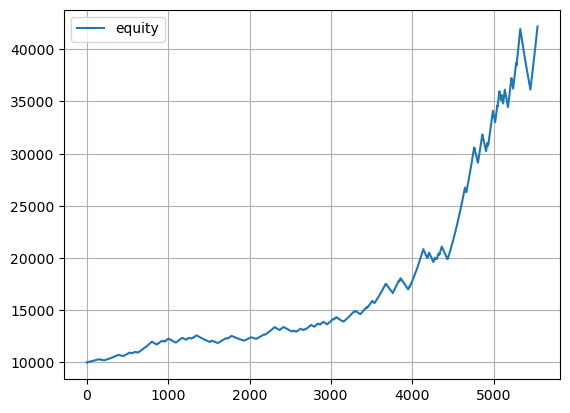

In [255]:
trade_log["equity"].plot()
plt.grid()
plt.legend()

## Sharpe Ratio
1 ) The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. <br>
2 ) Volatility is a measure of the price fluctuations of an asset or portfolio. <br>
3 ) Sharpe Ratio = (Rate of Return - Risk Free Rate) / (Standard deviation of the asset or portfolio)


In [225]:
number_of_trading_days_in_a_year = 252
risk_free_interest_rate = 5
avg_ror = trade_log['rate_of_return'].mean() * number_of_trading_days_in_a_year - risk_free_interest_rate
sigma = trade_log['rate_of_return'].std() * np.sqrt(number_of_trading_days_in_a_year)

sharpe_ratio = avg_ror/sigma
print("Sharpe Ratio:", round(sharpe_ratio, 2))

Sharpe Ratio: 1.23


## Sortino Ratio
1 ) The Sortino ratio differentiates harmful volatility from total overall volatility by using the asset's downside deviation. <br>
2 ) The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. <br>
3 ) Downside deviation is a measure of downside risk that focuses on returns that fall below a minimum threshold or minimum acceptable return 

In [226]:
downside_sigma = trade_log[trade_log['rate_of_return']<0]['rate_of_return'].std() * np.sqrt(number_of_trading_days_in_a_year)
sortino_ratio = avg_ror/downside_sigma

print("Sortino Ratio:", round(sortino_ratio, 2))

Sortino Ratio: 2.93


## Max Drawdown
A maximum drawdown is the maximum observed loss

In [227]:
trade_log['drawdown'] = trade_log['pnl_including_slippage_cumulative_sum'] - trade_log['pnl_including_slippage_cumulative_sum'].cummax()
max_drawdown = trade_log['drawdown'].min()

print("Max Drawdown:", round(max_drawdown, 2))

Max Drawdown: -5804.01


In [228]:
max_drawdown_percent = (max_drawdown / trade_log[trade_log['drawdown']==trade_log['drawdown'].min()]['equity'].iloc[0]) * 100

print("Max Drawdown Percent:", round(max_drawdown_percent, 2), "%")

Max Drawdown Percent: -16.06 %


## Recovery Trades
Number of trades taken to recover the max drawdown

In [229]:
trade_log['recovery'] = 0
for i in range(len(trade_log)):
    if (trade_log.loc[i, 'drawdown'] < 0):
        trade_log.loc[i, 'recovery'] = trade_log['recovery'].iloc[i-1] + 1

recovery_trades = trade_log['recovery'].max()
print("Maximum Recovery Trades:", recovery_trades)

Maximum Recovery Trades: 815


## Recovery Days
Number of days taken to recover the max drawdown

In [231]:
trade_log.loc[:, 'entry_time'] = pd.to_datetime(trade_log['entry_time'])
trade_log_equity_high = trade_log[trade_log['recovery'] == 0]
trade_log_equity_high.loc[:, 'number_days_between_equity_highs'] = (trade_log_equity_high['entry_time'] - trade_log_equity_high['entry_time'].shift())
recovery_days = int(trade_log_equity_high['number_days_between_equity_highs'].apply(lambda x: x.days).max())

recovery_days

C:\Users\Faizan\miniconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


1260

## Compounded Annual Growth Rate (CAGR)
Tells us how much is the average rate of return per year

In [232]:
number_of_trading_days_for_this_backtest = (trade_log.iloc[-1]['entry_time'].date() - trade_log.iloc[0]['entry_time'].date()).days
number_of_trading_days_for_this_backtest = int(number_of_trading_days_for_this_backtest)
cagr = (((trade_log.iloc[-1]['equity']/initial_capital)**(1/(number_of_trading_days_for_this_backtest/365)))-1)*100

print("CAGR:", round(cagr, 2), "%")

CAGR: 5.54 %


## Calmar Ratio
 Measures the performance of a strategy or fund, compared to its risk

In [233]:
calmar_ratio = abs(cagr/max_drawdown_percent)

print("Calmar Ratio:", round(calmar_ratio, 2))

Calmar Ratio: 0.35


In [234]:
trade_log

,trade_type,entry_time,entry_price,exit_time,exit_price,pnl,pnl_cumulative_sum,entry_including_slippage,exit_including_slippage,pnl_including_slippage,pnl_including_slippage_cumulative_sum,equity,rate_of_return,drawdown,recovery
0,BUY,1996-01-25,62.572500,1996-01-25,61.946775,-0.625725,-0.625725,62.885363,61.637041,-1.248321,-1.248321,9998.751679,-0.012483,0.000000,0
1,BUY,1996-02-02,63.299999,1996-02-02,65.831999,2.532000,1.906275,63.616499,65.502839,1.886340,0.638019,10000.638019,0.018866,0.000000,0
2,BUY,1996-02-05,63.884998,1996-02-05,66.440398,2.555400,4.461675,64.204423,66.108196,1.903773,2.541792,10002.541792,0.019037,0.000000,0
3,BUY,1996-02-06,64.892501,1996-02-06,67.488202,2.595700,7.057375,65.216964,67.150761,1.933797,4.475588,10004.475588,0.019333,0.000000,0
4,BUY,1996-02-07,64.360000,1996-02-07,66.934401,2.574400,9.631775,64.681801,66.599729,1.917928,6.393516,10006.393516,0.019171,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,BUY,2022-09-21,2398.474976,2022-09-21,2494.413975,95.938999,65568.069319,2410.467350,2481.941905,71.474554,31890.337446,41890.337446,0.170915,-52.545037,208
5534,BUY,2022-09-22,2413.600098,2022-09-22,2510.144102,96.544004,65664.613323,2425.668098,2497.593381,71.925283,31962.262729,41962.262729,0.171699,0.000000,0
5535,BUY,2022-09-23,2484.375000,2022-09-23,2583.750000,99.375000,65763.988323,2496.796875,2570.831250,74.034375,32036.297104,42036.297104,0.176431,0.000000,0
5536,BUY,2022-09-26,2526.825074,2022-09-26,2627.898076,101.073003,65865.061326,2539.459199,2614.758586,75.299387,32111.596491,42111.596491,0.179129,0.000000,0


# Backtesting Report

In [257]:
#Creating the Backtesting report
report = pd.DataFrame()

report["Metrics"] = ["Total Trades", "Profitable Trades", "Lossing Trades", "Win Rate", "Avg Profit per Trade",
                     "Avg Loss per Trade", "Risk Reward Ratio", "Expectency","Avg ROR per trade", "Sharpe Ratio", 
                     "Sortino Ratio", "Max Drawdown; in percent", "Recovery Trades", "Recovery Days", "CAGR", "Calmar Ratio"]

report["Values"] = [len(trade_log), profitable_trades, lossing_trades, round(win_rate, 2), round(avg_profit, 2), 
                    round(avg_loss, 2), round(risk_reward, 2), round(expectancy, 2), round(avg_ror, 2), round(sharpe_ratio, 2), 
                    round(sortino_ratio, 2), 
                    str(round(max_drawdown, 2))+"; "+str(round(max_drawdown_percent, 2))+" %", recovery_trades,                         
                    recovery_days, round(cagr, 2), round(calmar_ratio, 2)]

report

,Metrics,Values
0,Total Trades,5538
1,Profitable Trades,3264
2,Lossing Trades,2274
3,Win Rate,0.59
4,Avg Profit per Trade,18.15
5,Avg Loss per Trade,-11.9
6,Risk Reward Ratio,1.53
7,Expectency,15.59
8,Avg ROR per trade,1.56
9,Sharpe Ratio,1.23
